## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.
Business Goal: You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

## Step 1: Reading and Understanding the Data

In [ ]:
url = 'day.csv'
bike = pd.read_csv(url)

In [ ]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bike.shape

(730, 16)

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Missing Values

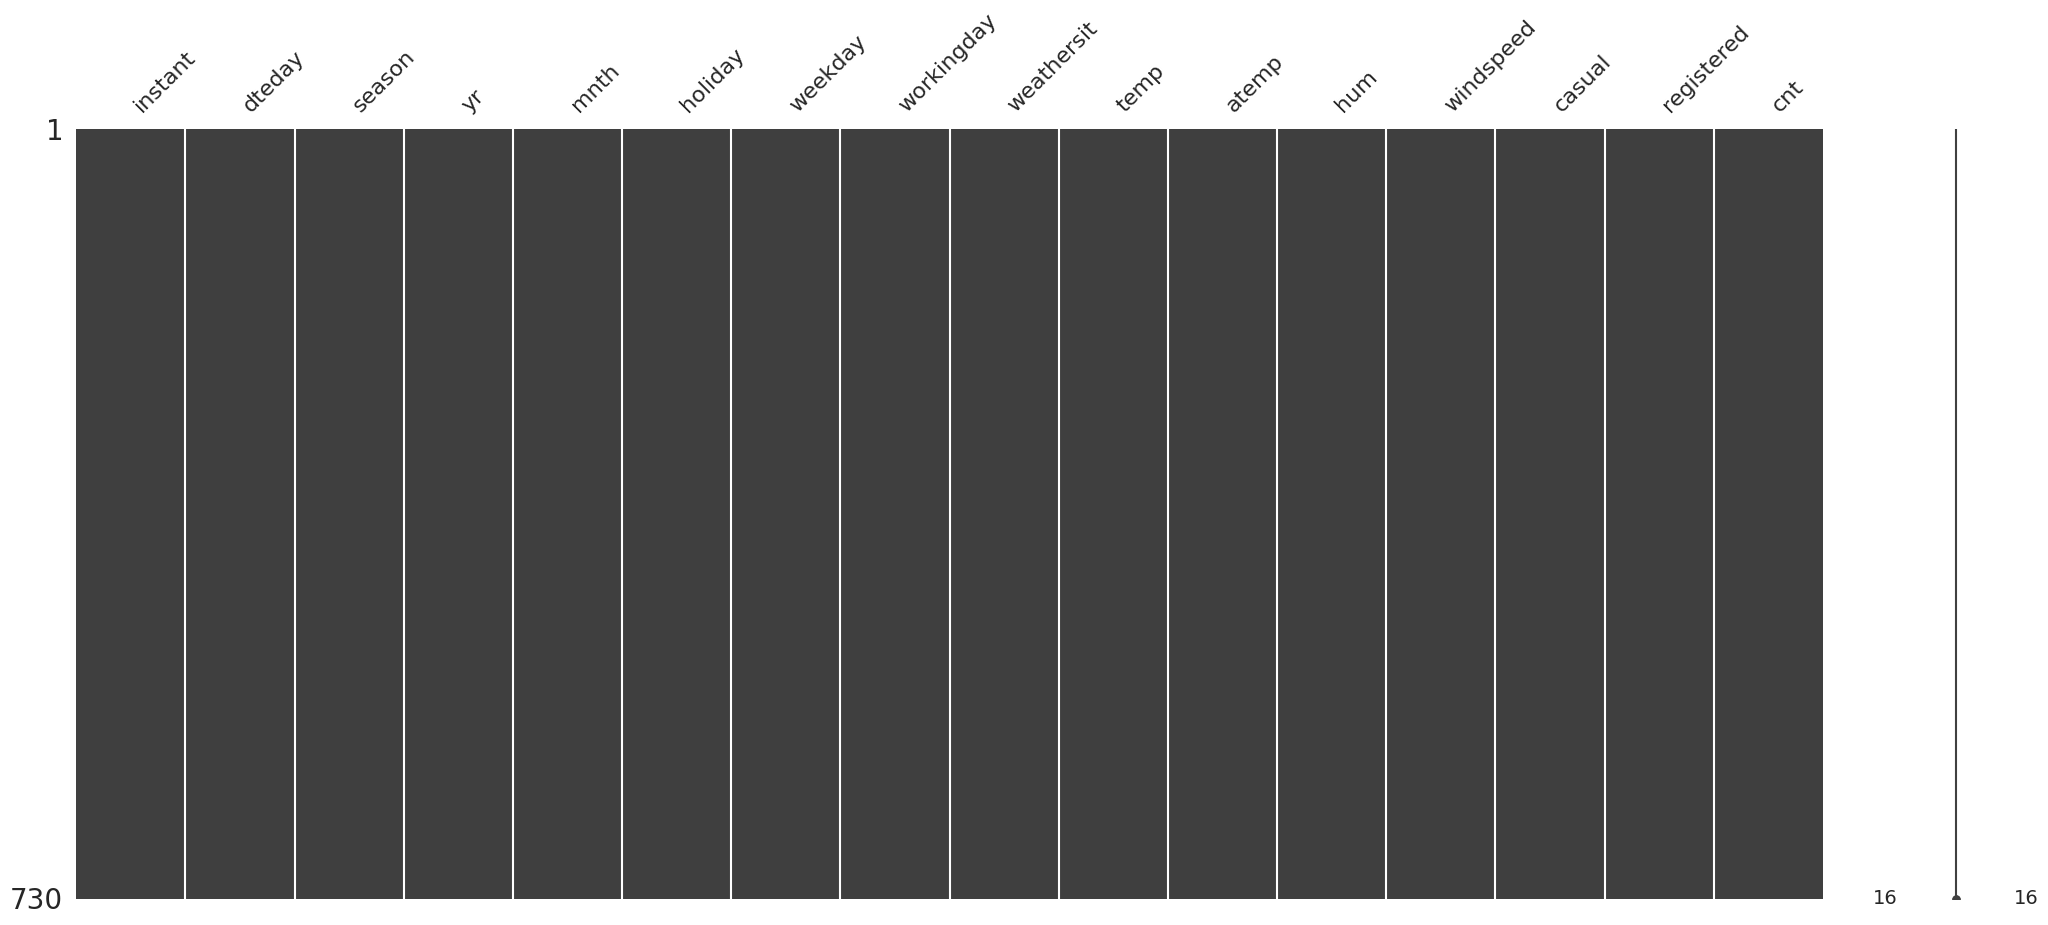

In [ ]:
# to check if there are any missing values in the dataset

import missingno as mn
mn.matrix(bike)
plt.show()

### There is no missing values in the dataset

In [ ]:
bike['dteday'].dtype

dtype('O')

### Let's convert the datatype of dteday column to datetime

In [ ]:
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%d-%m-%Y')
bike['dteday'].dtype

dtype('<M8[ns]')

### Extracting the Year and Month from Date

In [ ]:
bike['year'] = pd.DatetimeIndex(bike['dteday']).year
bike['month'] = pd.DatetimeIndex(bike['dteday']).month

In [ ]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [ ]:
# dropping the columns as we have extracted the correct year and month from date.

bike.drop(['yr', 'mnth'], axis=1, inplace=True)

In [ ]:
bike.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [ ]:
# dropping the dteday, casual and registered columns.

bike.drop(['dteday', 'instant', 'casual', 'registered'], axis=1, inplace=True)

In [ ]:
bike.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [ ]:
# renaming some columns for better understanding

bike.rename(columns={'hum':'humidity', 'cnt':'count'}, inplace=True)

In [ ]:
bike.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


##  Step 2: Encoding the Labels & Visualization

### 1). season

- 1: spring
- 2: summer
- 3: fall
- 4: winter

In [ ]:
codes = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike['season'] = bike['season'].map(codes)

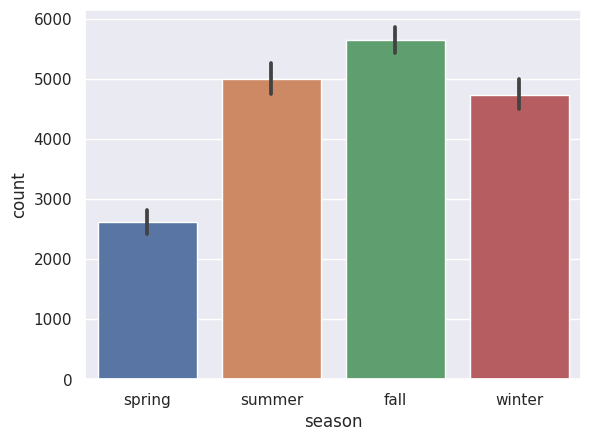

In [ ]:
sns.barplot(x='season', y='count', data=bike)
plt.show()

#### Bike Rentals are more during the fall (monsoon) season.

### 2). weathersit

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(codes)

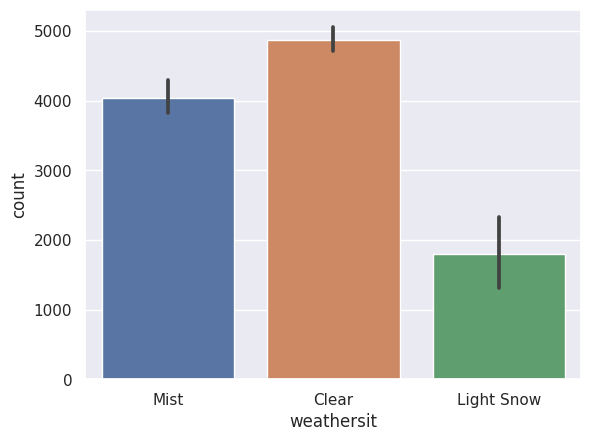

In [ ]:
sns.barplot(x='weathersit', y='count', data=bike)
plt.show()

#### Bikes seems to be rented more in Partly coludy weather.

### 3). workingday

- if day is neither weekend nor holiday is 1
- otherwise is 0

In [ ]:
codes = {1:'working_day',0:'Holiday'}
bike['workingday'] = bike['workingday'].map(codes)

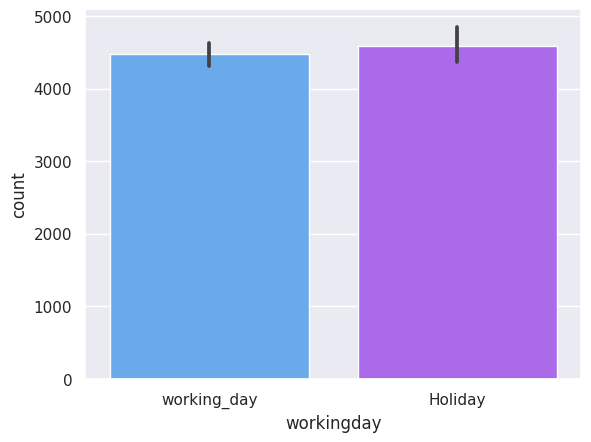

In [ ]:
sns.barplot(x='workingday', y='count', data=bike, palette='cool')
plt.show()

#### Bikes seems to be rented more on working days.

### 4). year

- 2018 : 0
- 2019 : 1

In [ ]:
codes = {2019:1, 2018:0}
bike['year'] = bike['year'].map(codes)

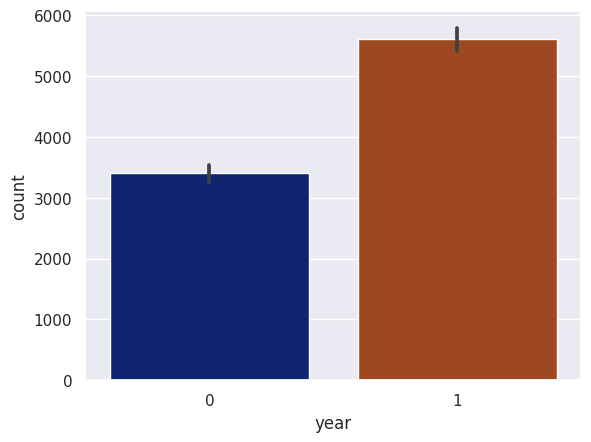

In [ ]:
sns.barplot(x='year', y='count', data=bike, palette='dark')
plt.show()

#### Bike Rental popularity has increased in 2019 when compared to 2018.

### 5) Month

- 1:Jan
- 2:Feb
- 3:Mar
- 4:Apr
- 5:May
- 6:June
- 7:July
- 8:Aug
- 9:Sep
- 10:Oct
- 11:Nov
- 12:Dec

In [ ]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['month'] = bike['month'].map(codes)

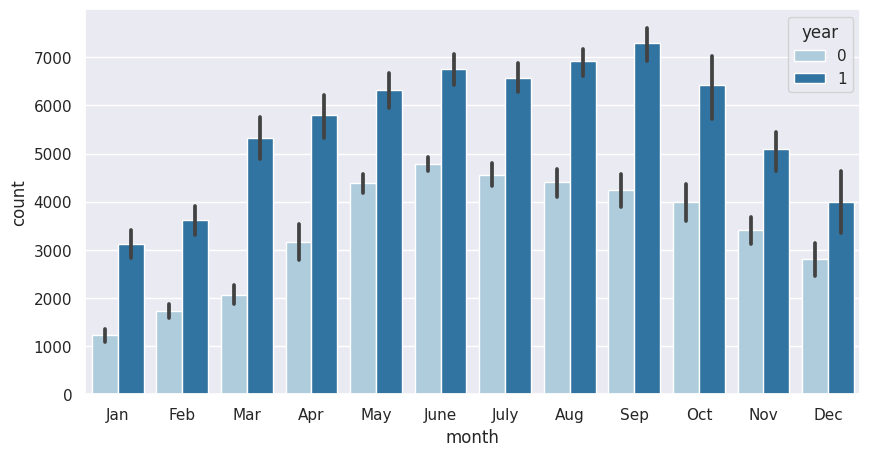

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='count', hue='year', data=bike, palette='Paired')
plt.show()

### 6) WeekDay:

- 0:Mon
- 1:Tue
- 2:Wed
- 3:Thu
- 4:Fri
- 5:Sat
- 6:Sun

In [ ]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['weekday'] = bike['weekday'].map(codes)

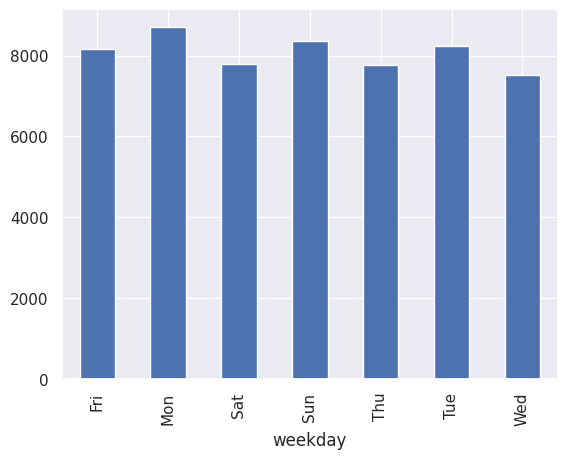

In [ ]:
bike.groupby('weekday')['count'].max().plot(kind='bar')
plt.show()

#### Bike Rentals are maximum on Sunday and Monday

### 7). temp

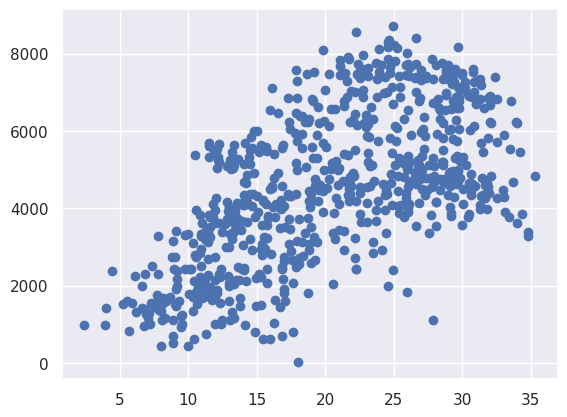

In [ ]:
plt.scatter(x='temp', y='count', data=bike)
plt.show()

#### Bike Rentals are observed at higher temperatures.

### 8). atemp

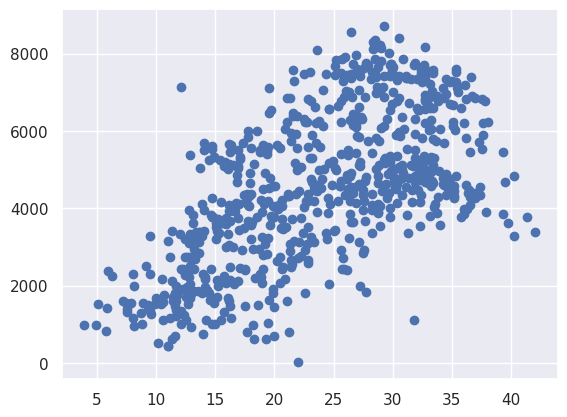

In [ ]:
plt.scatter(x='atemp', y='count', data=bike)
plt.show()

#### Bike Rentals are observed at higher "feel-like" temperatures.

### 9). humidity

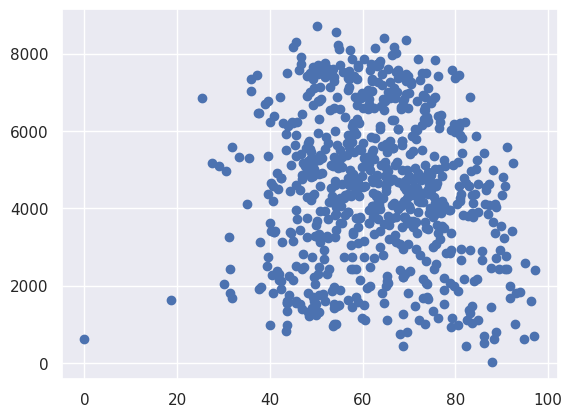

In [ ]:
plt.scatter(x='humidity', y='count', data=bike)
plt.show()

#### Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity.

### 10). Windspeed

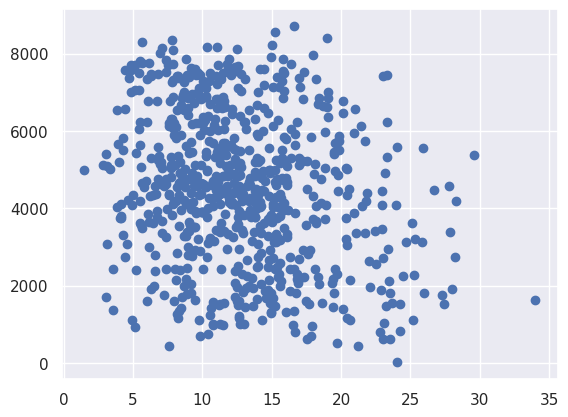

In [ ]:
plt.scatter(x='windspeed', y='count', data=bike)
plt.show()

#### Wind speeds increase with a greater temperature difference. Wind speed near the surface is most highly correlated with the temperature.

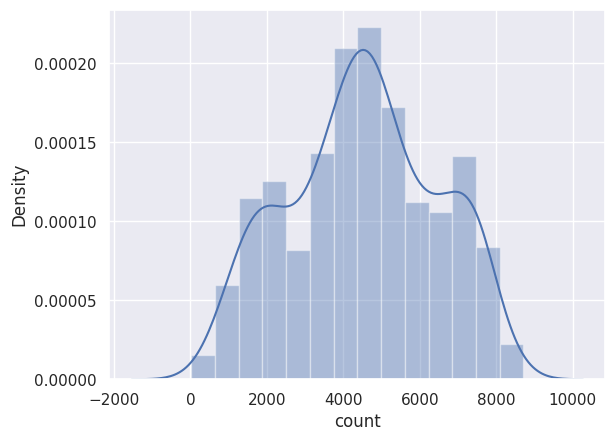

In [ ]:
sns.distplot(bike['count'])
plt.show()

## Step 3: Visualizing the Relationship among variables

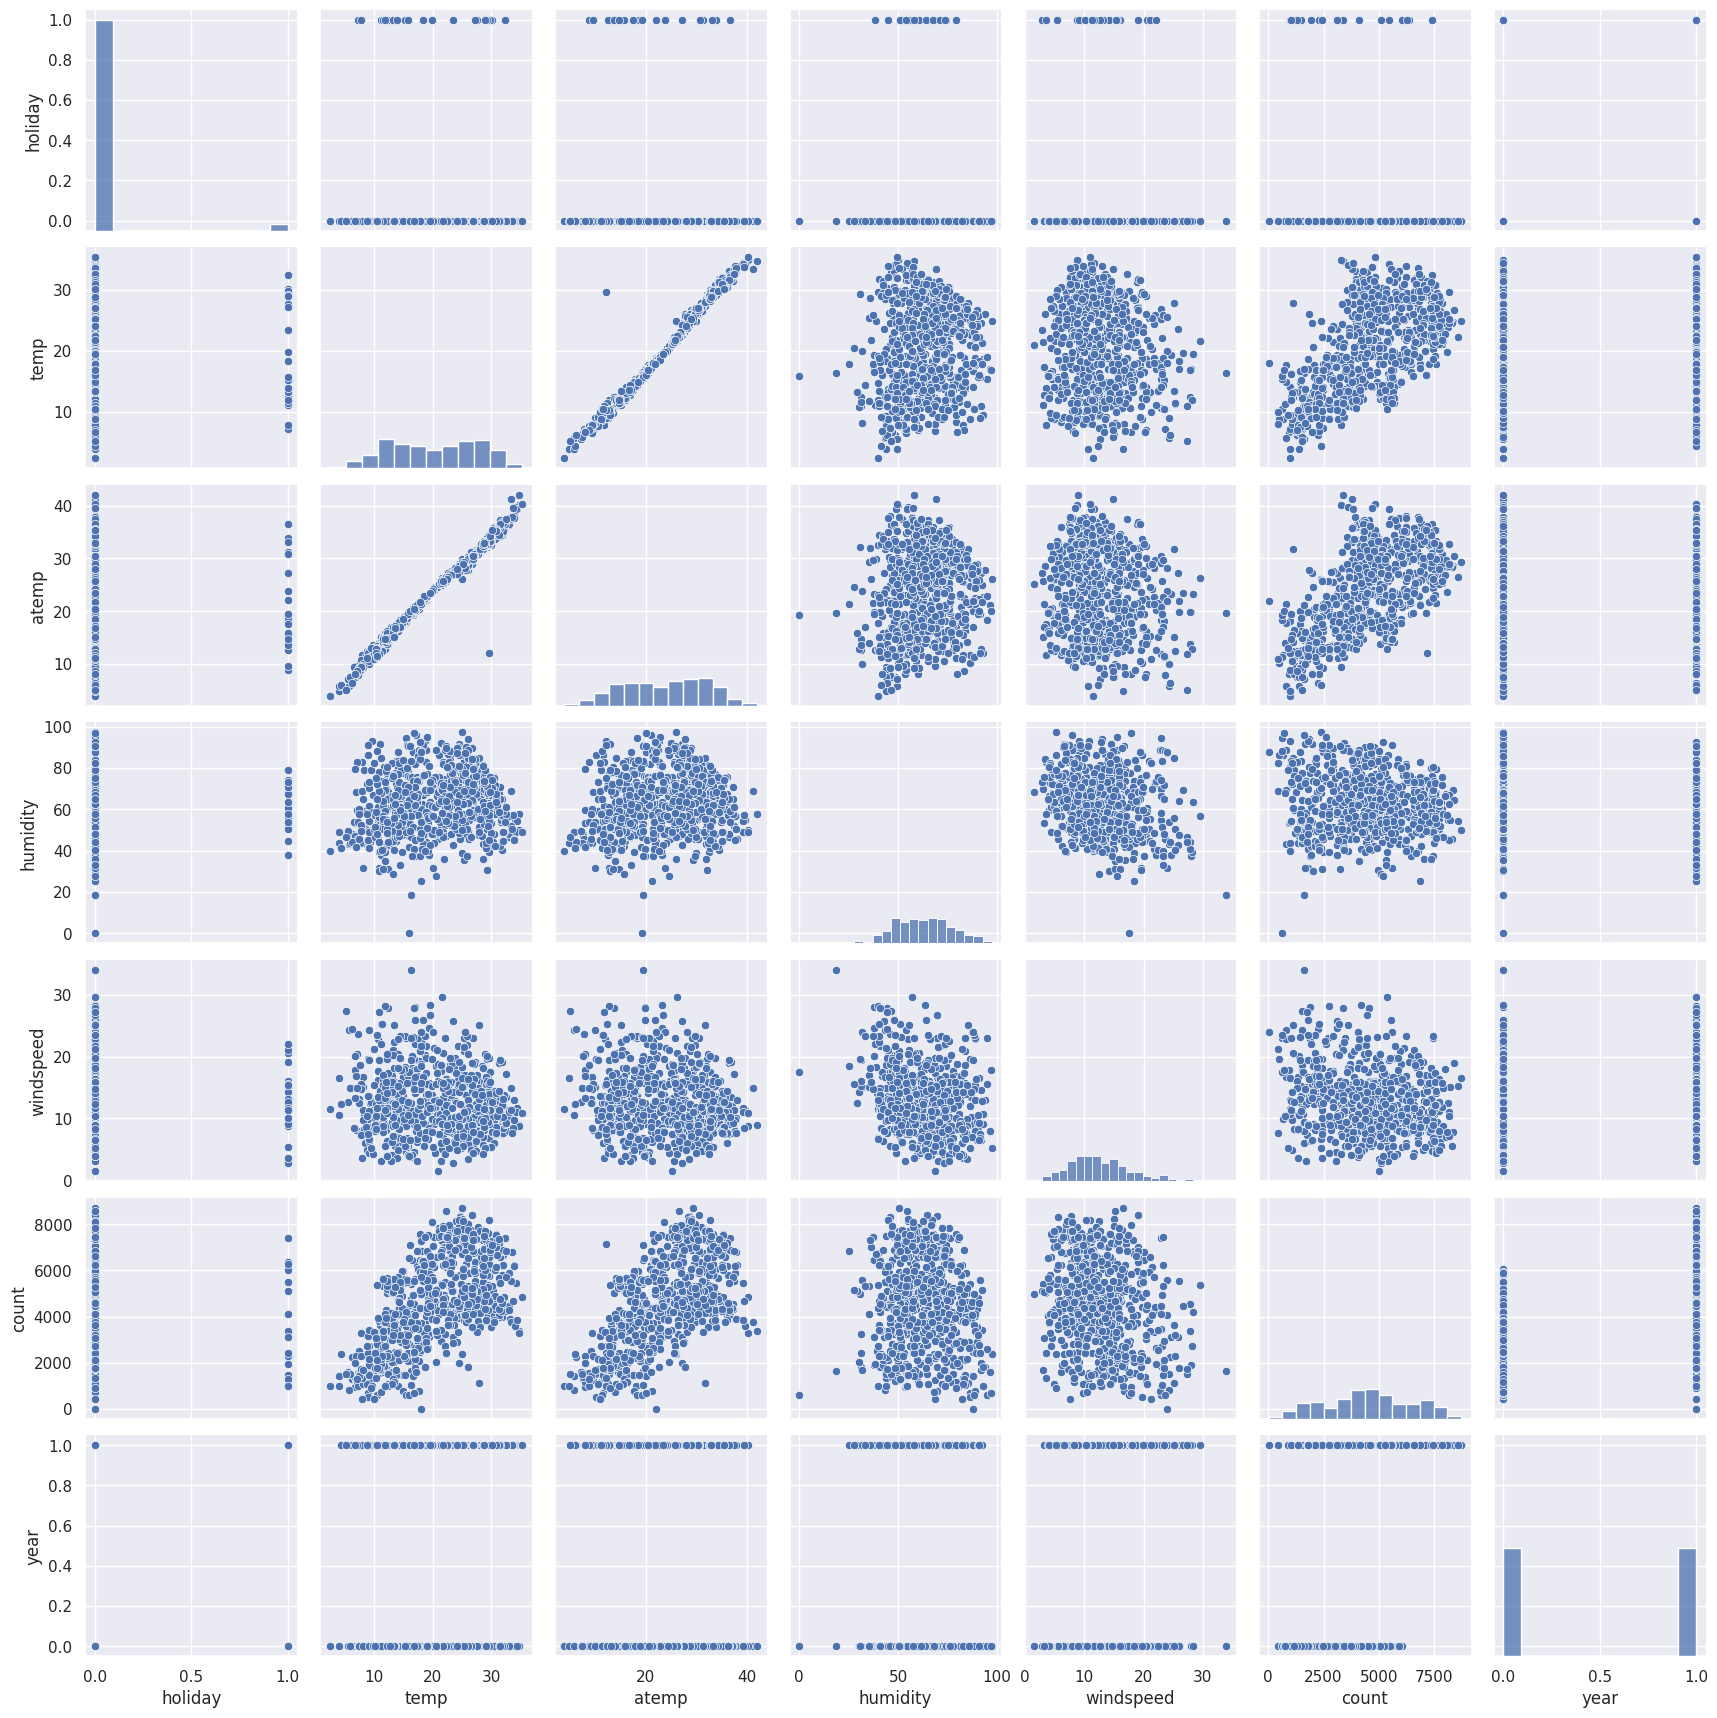

In [ ]:
sns.pairplot(bike)
plt.show()

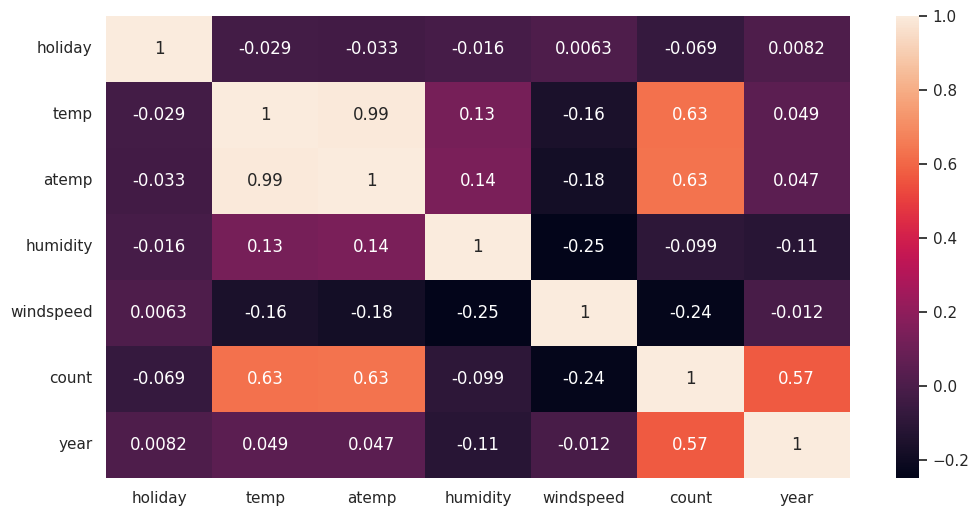

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(bike.corr(), annot=True)
plt.show()

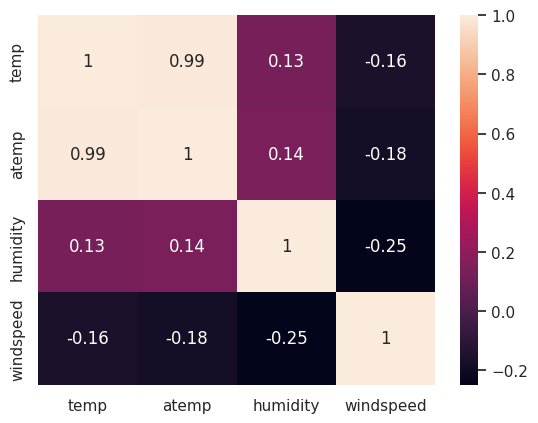

In [ ]:
data= bike[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(), annot=True)
plt.show()

#### It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.

In [ ]:
bike.drop('atemp', axis=1, inplace=True)

In [ ]:
bike.head()

,season,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,0,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,0,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,0,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,0,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,0,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


## Step 4 : Dealing With Categorical Variables

In [ ]:
seasons     = pd.get_dummies( bike['season'],     drop_first=True)
working_day = pd.get_dummies( bike['workingday'], drop_first=True)
weather     = pd.get_dummies( bike['weathersit'], drop_first=True)
month       = pd.get_dummies( bike['month'],      drop_first=True)
week_day    = pd.get_dummies( bike['weekday'],    drop_first=True)

In [ ]:
bike = pd.concat([bike, seasons, working_day, weather, month, week_day], axis=1)

In [ ]:
bike.head()

,season,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,1,0
1,spring,0,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,1
2,spring,0,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
bike.drop(['season', 'workingday', 'weathersit', 'weekday', 'month'], axis=1, inplace=True)

In [ ]:
bike.head()

,holiday,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,14.110847,80.5833,10.749882,985,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,14.902598,69.6087,16.652113,801,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,8.200000,59.0435,10.739832,1562,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,9.305237,43.6957,12.522300,1600,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Step 5: Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply scaler() to all the columns except the'dummy' variables.
num_vars = ['temp', 'humidity', 'windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

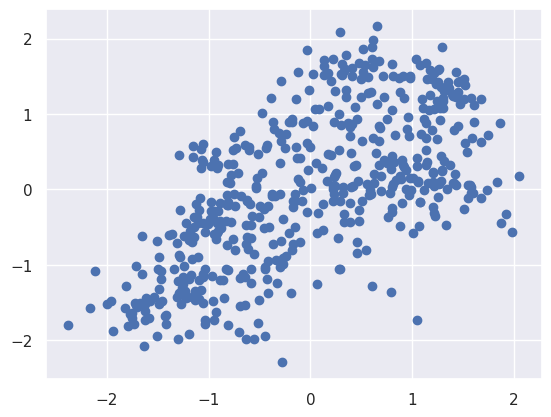

In [ ]:
plt.scatter(x='temp', y='count', data=df_train)
plt.show()

### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('count')
X_train = df_train

## Step 6: Building a linear model

### Using Recursive feature elimination (RFE) for automated Feature Selection approach

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('humidity', False, 11),
 ('windspeed', False, 6),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('working_day', False, 7),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 14),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 18),
 ('Mar', False, 19),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 17),
 ('Sun', False, 8),
 ('Thu', False, 15),
 ('Tue', False, 13),
 ('Wed', False, 12)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'year', 'spring', 'winter', 'Light Snow', 'Mist',
       'July', 'Nov', 'Sep'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train, X_train_rfe).fit()   # Running the linear model

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          7.68e-181
Time:                        16:03:18   Log-Likelihood:                -281.22
No. Observations:                 510   AIC:                             584.4
Df Residuals:                     499   BIC:                             631.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2908      0.043     -6.829      0.000      -0.374      -0.207
holiday       -0.4245      0.121     -3.503      0.001      -0.663      -0.186
temp           0.4668      0.032     14.755      0.000       0.405       0.529
year           1.0389      0.038     27.364      0.000       0.964       1.113
spring        -0.5071      0.070     -7.218      0.000      -0.645      -0.369
winter         0.2899      0.061      4.740      0.000       0.170       0.410
Light Snow    -1.3461      0.114    -11.853      0.000      -1.569      -1.123
Mist          -0.3575      0.040     -8.834      0.000      -0.437      -0.278
July          -0.3022      0.080     -3.777      0.000      -0.459      -0.145
Nov           -0.1422      0.081     -1.758      0.079      -0.301       0.017
Sep            0.2830      0.073      3.897      0.000       0.140       0.426
==============================================================================
Omnibus:                       70.276   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.677
Skew:                          -0.682   Prob(JB):                     1.07e-41
Kurtosis:                       5.649   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now we have all the variables with p-value less than 0.05

In [ ]:
X_train_new = X_train_rfe.drop('const', axis=1)

### Variance Inflation Factor(VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.44
3,spring,2.22
4,winter,2.03
2,year,1.67
8,Nov,1.59
6,Mist,1.36
7,July,1.34
9,Sep,1.17
0,holiday,1.06
5,Light Snow,1.05


### All the variables have VIF less than 5 and it's perfect!

## Step 7: Residual Analysis of the train data

In [ ]:
y_train_pred = lm.predict(X_train_rfe)

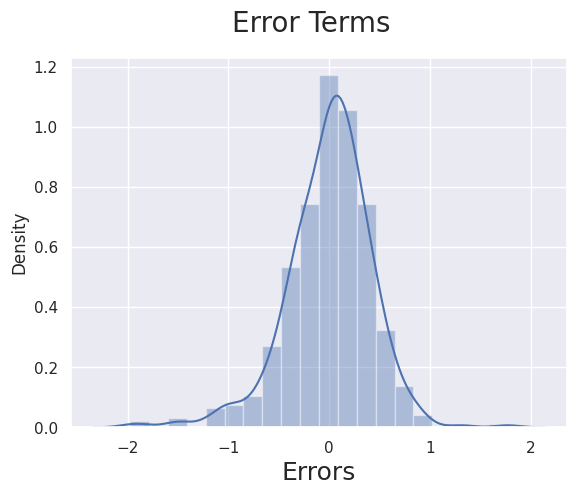

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)         # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Step 8: Making Predictions

In [ ]:
num_vars = ['temp', 'humidity', 'windspeed', 'count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('count')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation

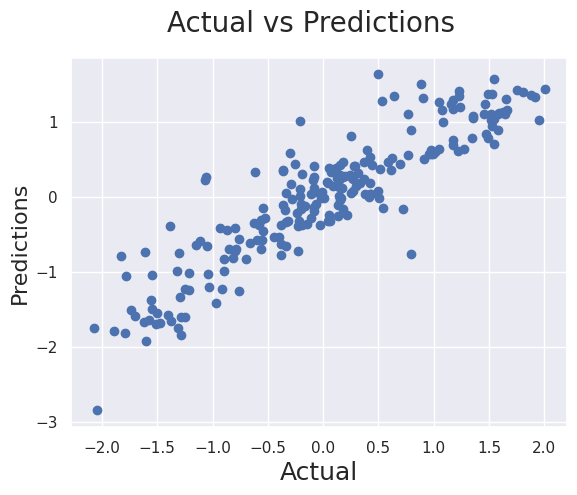

In [ ]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_test_pred)

fig.suptitle('Actual vs Predictions', fontsize=20)     # Plot heading
plt.xlabel('Actual', fontsize=18)                      # X-label

plt.ylabel('Predictions', fontsize=16)                 # Y-label
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8130998159262322

## Conclusion:

The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

- Spring season : -0.6842
- Temperature : 0.3999
- Mist : -0.3647
- Sun : 0.2749
- working_day : 0.2327

## Assumptions of Linear Regression:

- The error terms are normally distributed.
- The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
- The predicted values have linear relationship with the actual values.